# Kaggle competition : How to predict Titanic :

<img src= 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1280px-RMS_Titanic_3.jpg' width=500/>

In [2]:
# Import des Librairies :

# Librairie d'analyse
import IPython.display
import numpy as np
import pandas as pd

# librairie de visu :

import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pour supprimer les warnings :
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# pip install autopep8
# PEP8 DONE

In [4]:
import os
import sys

# Open a file
path = "/Users/aurelien_gorguet/Projet_8_Titanic/"
dirs = os.listdir(path)

# This would print all the files and directories
for file in dirs:
    print(file),

test.csv
train.csv
gender_submission.csv


In [5]:
df_test = pd.read_csv('/Users/aurelien_gorguet/Projet_8_Titanic/test.csv')
df_train = pd.read_csv('/Users/aurelien_gorguet/Projet_8_Titanic/train.csv')
df_gender_submission = pd.read_csv(
    '/Users/aurelien_gorguet/Projet_8_Titanic/gender_submission.csv')

## Some function for vizualisation :

In [6]:
def pct_vals_miss(data: pd.DataFrame):
    """

    Parameters :
    ----------

    data: :class:`Dataframe`
    Percent for all the dataframe

    """
    somme = 0
    for i in list(data.columns):
        somme += data[i].isna().sum()
    return round((somme / (data.shape[0]*data.shape[1]))*100, 2)

In [7]:
# DataFrame de visualisation des manquants :

def miss_value(data: pd.DataFrame):
    """
    For the % of missing data.

    Parameters:
    ----------

    data: :class:`Dataframe`
    DataFrame % of missing data by column.

    """

    print('-'*100)
    print(" "*41, '\033[1m' + "Missing Data :"+'\033[0m')  # Describe
    print('-'*100)

    dico = {}  # dictionnary
    for col in data.columns:
        dico[col] = []
        dico[col].append(
            round((data[col].notnull().sum()/data.shape[0])*100, 2))
        dico[col].append(data[col].isnull().sum())

    df = pd.DataFrame.from_dict(data=dico, orient="index", columns=[
                                "Percent", "Missing_Data"]).sort_values(by="Missing_Data", ascending=True)
    display(df)

    print('-'*100)
    print(" "*25, '\033[1m'+f" The percent of missing data is :",
          pct_vals_miss(data), "%"+'\033[0m')
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html => En cas de modif

In [8]:
# Permet de visualiser le DF :

def visu(data: pd.DataFrame):

    print('-'*100)
    print(" "*45, '\033[1m' + "Shape :"+'\033[0m')  # shape
    print('-'*100, "\n")
    print(f"The shape of the DataFrame is : {data.shape} \n")
    print('-'*100)
    print(" "*45, '\033[1m' + "Head :"+'\033[0m')  # Head
    print('-'*100)
    display(data.head())  # visualisation du df
    print('-'*100)
    print(" "*45, '\033[1m' + "Describe :"+'\033[0m')  # Describe
    print('-'*100)
    display(data.describe().T)  # describe
    print('-'*100)
    print(" "*41, '\033[1m' + "Type of data :"+'\033[0m')  # Head
    print('-'*100)
    display(data.dtypes)

# Vizualisation of data :

### Vizualisation of Train data :

In [9]:
visu(df_train)

----------------------------------------------------------------------------------------------------
                                              Shape :
---------------------------------------------------------------------------------------------------- 

The shape of the DataFrame is : (891, 12) 

----------------------------------------------------------------------------------------------------
                                              Head :
----------------------------------------------------------------------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


----------------------------------------------------------------------------------------------------
                                              Describe :
----------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


----------------------------------------------------------------------------------------------------
                                          Type of data :
----------------------------------------------------------------------------------------------------


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
miss_value(df_train)

----------------------------------------------------------------------------------------------------
                                          Missing Data :
----------------------------------------------------------------------------------------------------


,Percent,Missing_Data
PassengerId,100.00,0
Survived,100.00,0
Pclass,100.00,0
Name,100.00,0
Sex,100.00,0
SibSp,100.00,0
Parch,100.00,0
Ticket,100.00,0
Fare,100.00,0
Embarked,99.78,2


----------------------------------------------------------------------------------------------------
                           The percent of missing data is : 8.1 %


### Vizualisation of Test data :

In [11]:
visu(df_test)

----------------------------------------------------------------------------------------------------
                                              Shape :
---------------------------------------------------------------------------------------------------- 

The shape of the DataFrame is : (418, 11) 

----------------------------------------------------------------------------------------------------
                                              Head :
----------------------------------------------------------------------------------------------------


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


----------------------------------------------------------------------------------------------------
                                              Describe :
----------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


----------------------------------------------------------------------------------------------------
                                          Type of data :
----------------------------------------------------------------------------------------------------


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
miss_value(df_test)

----------------------------------------------------------------------------------------------------
                                          Missing Data :
----------------------------------------------------------------------------------------------------


,Percent,Missing_Data
PassengerId,100.00,0
Pclass,100.00,0
Name,100.00,0
Sex,100.00,0
SibSp,100.00,0
Parch,100.00,0
Ticket,100.00,0
Embarked,100.00,0
Fare,99.76,1
Age,79.43,86


----------------------------------------------------------------------------------------------------
                           The percent of missing data is : 9.0 %


In [13]:
df_gender_submission
# Will be our future model to see if our prediction are good or not

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Correlation between data :

<AxesSubplot:>

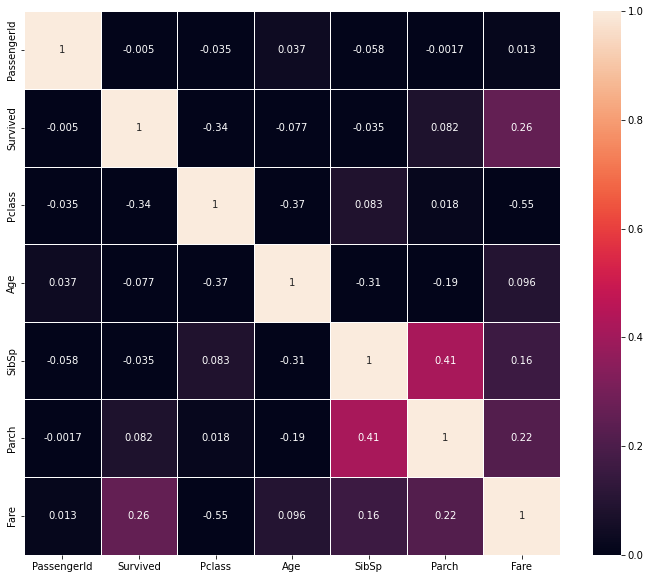

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr(), linewidths=.5, annot=True, vmin=0, vmax=1)

We can see a correlation between the price of the ticket and if people survived or not.

We can see too that if people comes with parents, they will come with children/spouses.

## Survive Age : 

In [15]:
# 0 is dead 1 is survived
display(df_train.groupby('Survived').mean())
# We can see that younger people survived
# Now let's see if you have a different between male and female

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


### Distribution of the Age :

Text(0, 0.5, 'Count')

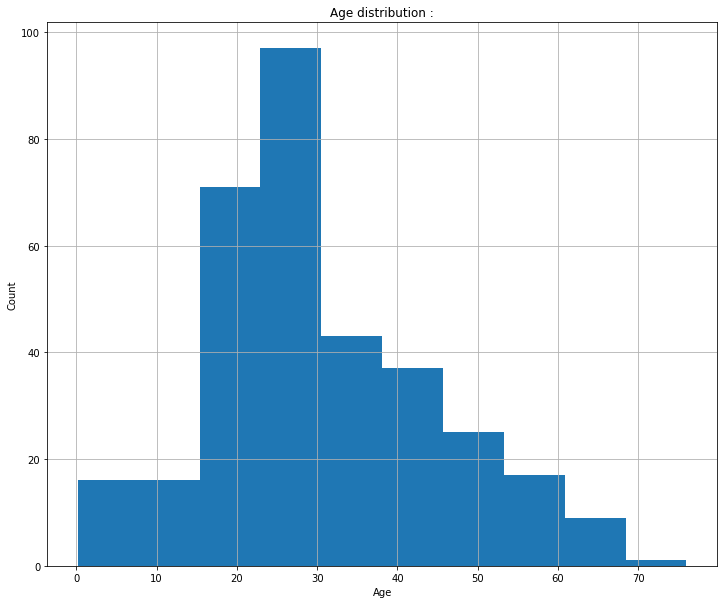

In [16]:
plt.figure(figsize=(12, 10))
plt.hist(df_test['Age'])
plt.title('Age distribution :')
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('Count')

## Male / Female :

### Number of Male / Female :

Male and female are string, we will use a len() to count the number.

In [17]:
male_data = len(df_train[df_train['Sex'] == 'male'])
female_data = len(df_train[df_train['Sex'] == 'female'])
print(f"The number of males is :", '\033[1m' + str(male_data) + '\033[0m')
print(f"Te percentage of males is : " '\033[1m' + str(
    round(male_data/(male_data + female_data)*100, 2)), '%' + '\033[0m')
print(f"The number of females is :", '\033[1m' + str(female_data) + '\033[0m')
print(f"Te percentage of females is : " '\033[1m' + str(
    round(female_data/(male_data + female_data)*100, 2)), '%' + '\033[0m')

The number of males is : 577
Te percentage of males is : 64.76 %
The number of females is : 314
Te percentage of females is : 35.24 %


We can see that we have more male than female close to 2/3 of male.

Let's see how much men and women survived here.

### Number of Male / Female survived:

With a groupby sex, we can found the number of surviving people.

In [18]:
alive = len(df_train[df_train['Survived'] == 1])
dead = len(df_train[df_train['Survived'] == 0])

In [19]:
display(df_train.groupby('Sex')[['Survived']].mean())

,Survived
Sex,
female,0.742038
male,0.188908


We found that male people was 64% but here we can see that women are far far away more surviving than men.

## Pclass (Ticket class):

Here we will see if you have a difference between class if people will survive or not.

In [20]:
df_pclass = df_train.groupby(['Pclass']).mean()
df_pclass

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


here, we can see that the pclass 3 is more for younger people when pclass 1 is more for older people.

We can see that pclass 1 are the most expensive ticket too(Fare).

Now let's see about which class survived the most and died the most.

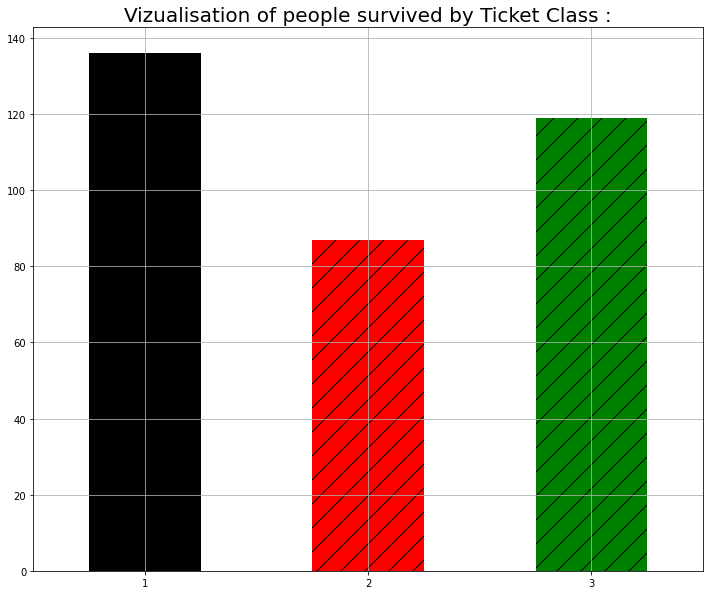

In [21]:
survive_ticket = df_train.loc[df_train['Survived']
                              == 1, 'Pclass'].value_counts().sort_index()
plt.figure(figsize=(12, 10))
survive_ticket.plot.bar(color=['black', 'red', 'green'], hatch='/')
plt.title('Vizualisation of people survived by Ticket Class :', size=20)
plt.xticks(rotation=0)
plt.grid(True)

For the population for survived, we can see it's close to be equal.

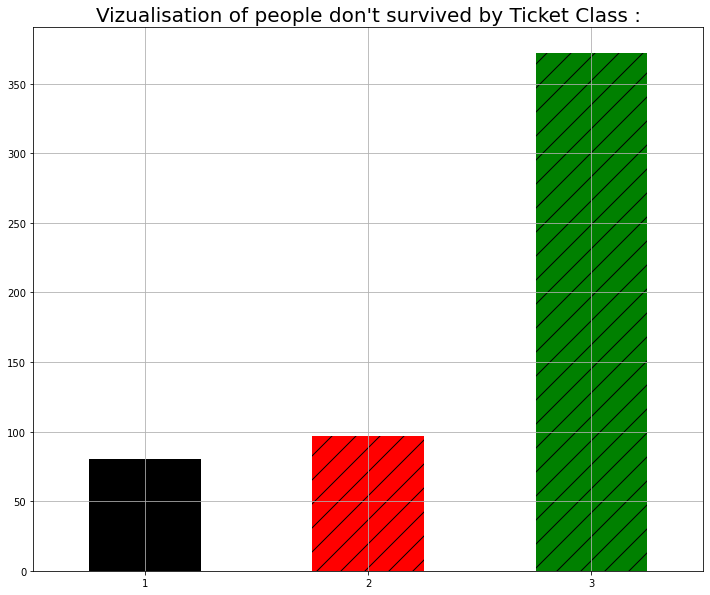

In [22]:
not_survive_ticket = df_train.loc[df_train['Survived']
                                  == 0, 'Pclass'].value_counts().sort_index()
plt.figure(figsize=(12, 10))
not_survive_ticket.plot.bar(color=['black', 'red', 'green'], hatch='/')
plt.title("Vizualisation of people don't survived by Ticket Class :", size=20)
plt.xticks(rotation=0)
plt.grid(True)

for the population for died, we can see it's the 3rd one who died the most. It's the youngest one too.

We can even see than more you spend for your ticket, more you will survive.

## Embarked :

Here we will use pivot_table to see if the embarked place as an impact or not.

In [23]:
pivot_embarked = pd.pivot_table(
    df_train, index='Survived', columns='Embarked', values='PassengerId', aggfunc='count')

In [24]:
pivot_embarked

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [25]:
print(f" The percentage of survive when you are embarked on quai C is :", '\033[1m' + str(round(
    pivot_embarked['C'][1] / (pivot_embarked['C'][1] + pivot_embarked['C'][0])*100, 2)) + '\033[0m', '%')
print(f" The percentage of survive when you are embarked on quai Q is :", '\033[1m' + str(round(
    pivot_embarked['Q'][1] / (pivot_embarked['Q'][1] + pivot_embarked['Q'][0])*100, 2)) + '\033[0m', '%')
print(f" The percentage of survive when you are embarked on quai S is :", '\033[1m' + str(round(
    pivot_embarked['S'][1] / (pivot_embarked['S'][1] + pivot_embarked['S'][0])*100, 2)) + '\033[0m', '%')

 The percentage of survive when you are embarked on quai C is : 55.36 %
 The percentage of survive when you are embarked on quai Q is : 38.96 %
 The percentage of survive when you are embarked on quai S is : 33.7 %


So as we can see, you have a little bit more chance to survive if you are embarked from quai C.

# Features Engineering :

## Cabins Letters and Numbers  :

### Let's see number of cabins :

In [26]:
df_train['cabins_number'] = df_train['Cabin'].apply(
    lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [27]:
# control if multiple cabins now
df_train[['cabins_number']].value_counts()
# As we can see you have multiple cabins

cabins_number
0                687
1                180
2                 16
3                  6
4                  2
dtype: int64

In [28]:
pivot_cabins_number = pd.pivot_table(
    df_train, index='Survived', columns='cabins_number', values='PassengerId', aggfunc='count')

In [29]:
pivot_cabins_number[0]

Survived
0    481.0
1    206.0
Name: 0, dtype: float64

As we can see more the number of cabins is higher more you have a chance to survive.

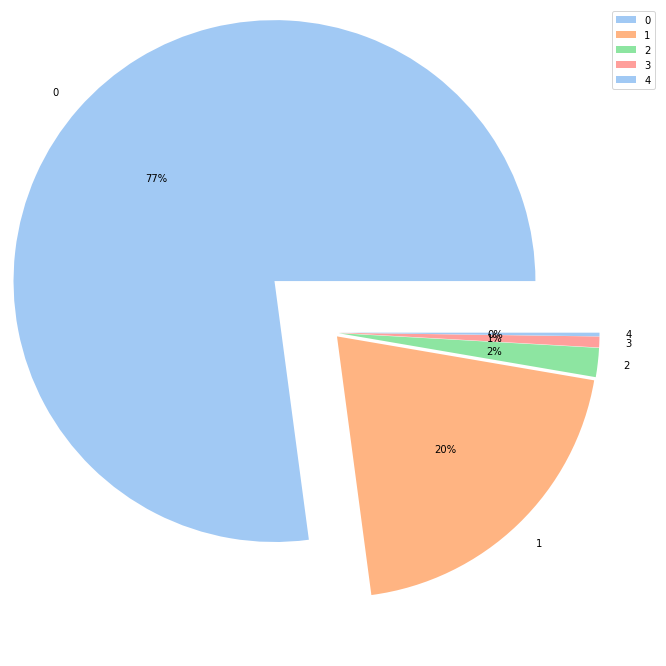

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# define data
data = df_train[['cabins_number']].value_counts()
labels = ['0', '1', '2', '3', '4']

# define Seaborn color palette to use
explode = [0.3, 0.02, 0.02, 0.02, 0.02]
colors = sns.color_palette('pastel')[0:4]

# create pie chart
plt.figure(figsize=(12, 12))
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', explode=explode)
plt.legend(labels)
plt.show()

In [31]:
print(f" The percentage of survive when you are in cabin 0 is :", '\033[1m' + str(round(pivot_cabins_number[0][1] / (
    pivot_cabins_number[0][1] + pivot_cabins_number[0][0])*100, 2)) + '\033[0m', '%', "but in reality we dont have data that's why you have 0 here")
print(f" The percentage of survive when you are in cabin 1 is :", '\033[1m' + str(round(
    pivot_cabins_number[1][1] / (pivot_cabins_number[1][1] + pivot_cabins_number[1][0])*100, 2)) + '\033[0m', '%')
print(f" The percentage of survive when you are in cabin 2 is :", '\033[1m' + str(round(
    pivot_cabins_number[2][1] / (pivot_cabins_number[2][1] + pivot_cabins_number[2][0])*100, 2)) + '\033[0m', '%')
print(f" The percentage of survive when you are in cabin 3 is :", '\033[1m' + str(round(
    pivot_cabins_number[3][1] / (pivot_cabins_number[3][1] + pivot_cabins_number[3][0])*100, 2)) + '\033[0m', '%')
print(f" The percentage of survive when you are in cabin 4 is :", '\033[1m' + str(round(
    pivot_cabins_number[4][1] / (pivot_cabins_number[4][1] + pivot_cabins_number[4][0])*100, 2)) + '\033[0m', '%')

 The percentage of survive when you are in cabin 0 is : 29.99 % but in reality we dont have data that's why you have 0 here
 The percentage of survive when you are in cabin 1 is : 67.78 %
 The percentage of survive when you are in cabin 2 is : 56.25 %
 The percentage of survive when you are in cabin 3 is : 50.0 %
 The percentage of survive when you are in cabin 4 is : nan %


### And now letters :

In [32]:
df_train['cabins_letters'] = df_train['Cabin'].apply(lambda x: str(x)[0])

In [33]:
# control if multiple cabins now
df_train[['cabins_letters']].value_counts()
# As we can see you have multiple cabins

cabins_letters
n                 687
C                  59
B                  47
D                  33
E                  32
A                  15
F                  13
G                   4
T                   1
dtype: int64

In [34]:
pivot_cabins_letter = pd.pivot_table(
    df_train, index='Survived', columns='cabins_letters', values='PassengerId', aggfunc='count')

In [35]:
pivot_cabins_letter

cabins_letters,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [36]:
print(f" The percentage of survive when you are in cabin A is :", '\033[1m' + str(round(
    pivot_cabins_letter['A'][1] / (pivot_cabins_letter['A'][1] + pivot_cabins_letter['A'][0])*100, 2)) + '\033[0m', '%')
print(f" The percentage of survive when you are in cabin B is :", '\033[1m' + str(round(
    pivot_cabins_letter['B'][1] / (pivot_cabins_letter['B'][1] + pivot_cabins_letter['B'][0])*100, 2)) + '\033[0m', '%')
print(f" The percentage of survive when you are in cabin C is :", '\033[1m' + str(round(
    pivot_cabins_letter['C'][1] / (pivot_cabins_letter['C'][1] + pivot_cabins_letter['C'][0])*100, 2)) + '\033[0m', '%')
print(f" The percentage of survive when you are in cabin D is :", '\033[1m' + str(round(
    pivot_cabins_letter['D'][1] / (pivot_cabins_letter['D'][1] + pivot_cabins_letter['D'][0])*100, 2)) + '\033[0m', '%')
print(f" The percentage of survive when you are in cabin E is :", '\033[1m' + str(round(
    pivot_cabins_letter['E'][1] / (pivot_cabins_letter['E'][1] + pivot_cabins_letter['E'][0])*100, 2)) + '\033[0m', '%')
print(f" The percentage of survive when you are in cabin F is :", '\033[1m' + str(round(
    pivot_cabins_letter['F'][1] / (pivot_cabins_letter['F'][1] + pivot_cabins_letter['F'][0])*100, 2)) + '\033[0m', '%')
print(f" The percentage of survive when you are in cabin G is :", '\033[1m' + str(round(
    pivot_cabins_letter['G'][1] / (pivot_cabins_letter['G'][1] + pivot_cabins_letter['G'][0])*100, 2)) + '\033[0m', '%')
print(f" The percentage of survive when you are in cabin T is :", '\033[1m' + str(round(
    pivot_cabins_letter['T'][1] / (pivot_cabins_letter['T'][1] + pivot_cabins_letter['T'][0])*100, 2)) + '\033[0m', '%')
print(f" The percentage of survive when you are in cabin n is :", '\033[1m' + str(round(
    pivot_cabins_letter['n'][1] / (pivot_cabins_letter['n'][1] + pivot_cabins_letter['n'][0])*100, 2)) + '\033[0m', '%')

 The percentage of survive when you are in cabin A is : 46.67 %
 The percentage of survive when you are in cabin B is : 74.47 %
 The percentage of survive when you are in cabin C is : 59.32 %
 The percentage of survive when you are in cabin D is : 75.76 %
 The percentage of survive when you are in cabin E is : 75.0 %
 The percentage of survive when you are in cabin F is : 61.54 %
 The percentage of survive when you are in cabin G is : 50.0 %
 The percentage of survive when you are in cabin T is : nan %
 The percentage of survive when you are in cabin n is : 29.99 %


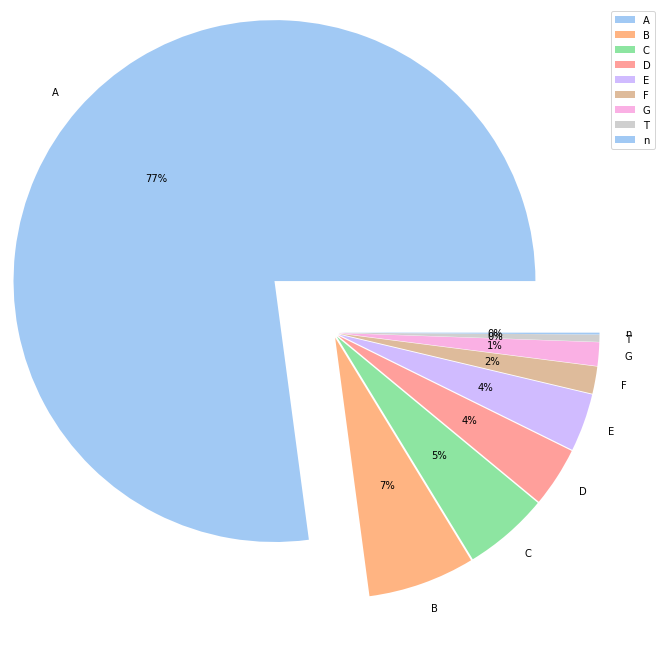

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# define data
data = df_train[['cabins_letters']].value_counts()
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'n']

# define Seaborn color palette to use
explode = [0.3, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]
colors = sns.color_palette('pastel')[0:8]

# create pie chart
plt.figure(figsize=(12, 12))
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', explode=explode)
plt.legend()
plt.show()

If you are in B D E and more you have chance to survive.

## Difference between Miss Mister etc etc :

In [38]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabins_number,cabins_letters
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,n
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,n
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,C


In [39]:
df_train['name_title_people'] = df_train['Name'].apply(
    lambda x: x.split(',')[1].split('.')[0].strip())

In [40]:
df_train[['name_title_people']].value_counts()

name_title_people
Mr                   517
Miss                 182
Mrs                  125
Master                40
Dr                     7
Rev                    6
Major                  2
Col                    2
Mlle                   2
Sir                    1
Ms                     1
Capt                   1
Mme                    1
Lady                   1
Jonkheer               1
Don                    1
the Countess           1
dtype: int64

In [41]:
pivot_rank = pd.pivot_table(df_train, index='Survived',
                            columns='name_title_people', values='PassengerId', aggfunc='count')

In [42]:
pivot_rank.fillna('0')

name_title_people,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,0,1.0,17.0,55.0,0,0,436.0,26.0,0,6.0,0,0
1,0,1.0,0,3.0,0,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,0,1.0,1.0


As we can see more you have a high rank more you have chance to survive. Same if you are a female.

## Cleaning missing Value :

In [43]:
miss_value(df_train)

----------------------------------------------------------------------------------------------------
                                          Missing Data :
----------------------------------------------------------------------------------------------------


,Percent,Missing_Data
PassengerId,100.00,0
Survived,100.00,0
Pclass,100.00,0
Name,100.00,0
Sex,100.00,0
SibSp,100.00,0
Parch,100.00,0
Ticket,100.00,0
Fare,100.00,0
cabins_number,100.00,0


----------------------------------------------------------------------------------------------------
                           The percent of missing data is : 6.48 %


In [44]:
miss_value(df_test)

----------------------------------------------------------------------------------------------------
                                          Missing Data :
----------------------------------------------------------------------------------------------------


,Percent,Missing_Data
PassengerId,100.00,0
Pclass,100.00,0
Name,100.00,0
Sex,100.00,0
SibSp,100.00,0
Parch,100.00,0
Ticket,100.00,0
Embarked,100.00,0
Fare,99.76,1
Age,79.43,86


----------------------------------------------------------------------------------------------------
                           The percent of missing data is : 9.0 %


As we can see, 6.48% of missing value from the dataset is from Age and Cabin.

For the cabin, it's impossible to know where the people will be better to delete the column and keep more data.

For the Age, except to use a median, it will be hard to find, so better to delete it.

In [45]:
display(df_train.head())
display(df_train.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabins_number,cabins_letters,name_title_people
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,Mr


(891, 15)

We need to do it for df_test too because we will need it for the prediction.

In [46]:
display(df_test.head())
display(df_test.shape)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 11)

For algorithms we will not use Cabins and Age. So for the point we can just pass the fact it's missing value.

We will use Embarked and Fare , so about the fact we can just use fillna(0), imputate it or just drop the 1 missing value.

In [47]:
# delete missing value on the column
df_test['Fare'] = df_test['Fare'].dropna()
# delete missing value on the column
df_train['Embarked'] = df_train['Embarked'].dropna()

# Algorithmes :

### Explaination :

We need to choose who will be x and y for our analysis. The most important is Age and Sex for our analyse so.

- We will use different Algorithme to see which one is the best for our configuration.

- We will use configuration matrix to see the difference

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [49]:
Features = ['Pclass', 'Sex', 'SibSp', 'Parch']
y = df_train['Survived']
y_test = df_gender_submission['Survived']
X = pd.get_dummies(df_train[Features])
X_test = pd.get_dummies(df_test[Features])

In [50]:
def confusion_matrix_view(y_test, y_pred, cm):

    cm = confusion_matrix(y_test, y_pred)
    group_names = ["True Negative", "False Positive",
                   "False Negative", "True Positive"]
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(12, 10))
    view = sns.heatmap(cm, annot=labels, fmt="", cmap='viridis')

    return(view)

In [51]:
def score(y_test, y_pred):

    print("The Accuracy score is :",
          '\033[1m' + str(round(accuracy_score(y_test, y_pred), 2)) + '\033[0m')
    print("The Precision score is :",
          '\033[1m' + str(round(precision_score(y_test, y_pred), 2)) + '\033[0m')

## Decision tree classifier :

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [53]:
def Decision_tree_classifier_pred(X, y, z):

    model = DecisionTreeClassifier(random_state=0)
    model.fit(X, y)
    y_pred = model.predict(z)
    data = pd.DataFrame(
        {'PassngerId': df_test['PassengerId'], 'Survived': y_pred})
    return(y_pred, data)

In [54]:
y_pred, data_frame_dtc = Decision_tree_classifier_pred(X, y, X_test)

In [55]:
data_frame_dtc
# Here we have a prediction with Decision tree classifier

,PassngerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [56]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

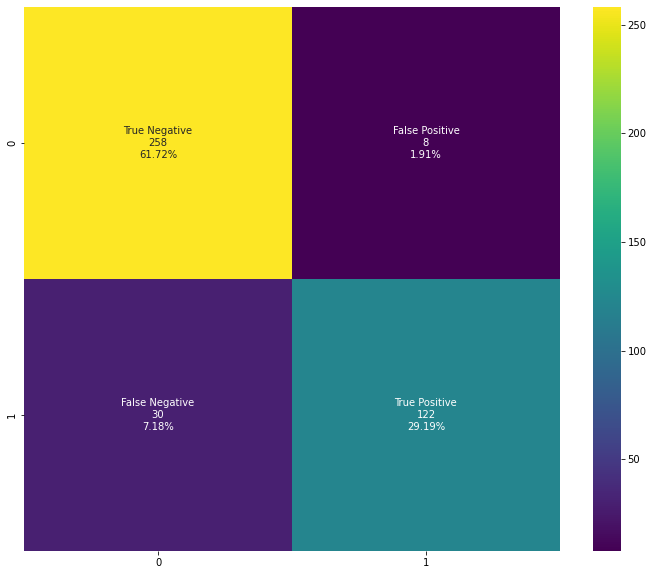

In [57]:
confusion_matrix_view(y_test, y_pred, cm)

In [58]:
score(y_test, y_pred)

The Accuracy score is : 0.91
The Precision score is : 0.94


## Random Forest :

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
def Random_Forest_Classifier_pred(X, y, z):

    model = RandomForestClassifier(random_state=0)
    model.fit(X, y)
    y_pred = model.predict(z)
    data = pd.DataFrame(
        {'PassengerId': df_test['PassengerId'], 'Survived': y_pred})
    return(y_pred, data)

In [61]:
y_pred, data_frame_rfc = Random_Forest_Classifier_pred(X, y, X_test)

In [62]:
data_frame_rfc

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [63]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

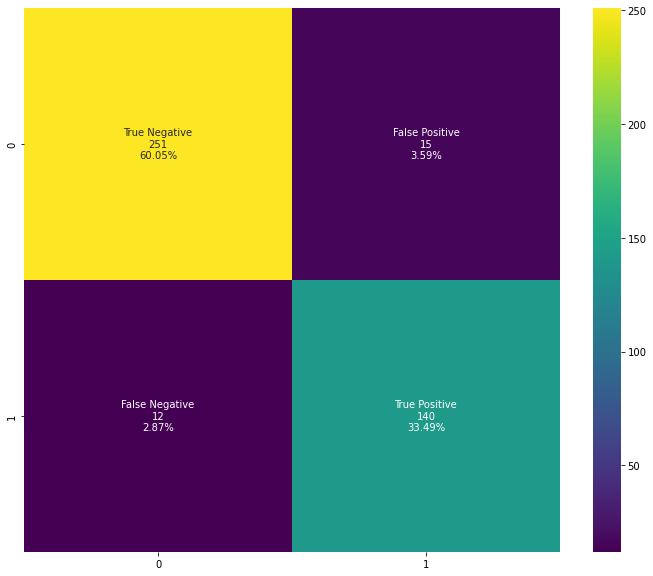

In [64]:
confusion_matrix_view(y_test, y_pred, cm)

In [65]:
score(y_test, y_pred)

The Accuracy score is : 0.94
The Precision score is : 0.9


## KNN : 

In [66]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

In [67]:
def KNN_pred(X, y, z):

    model = KNeighborsClassifier()
    model.fit(X, y)
    y_pred = model.predict(z)
    data = pd.DataFrame(
        {'PassengerId': df_test['PassengerId'], 'Survived': y_pred})
    return(y_pred, data)

In [68]:
y_pred, data_frame_knn = KNN_pred(X, y, X_test)

In [69]:
data_frame_knn

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<AxesSubplot:>

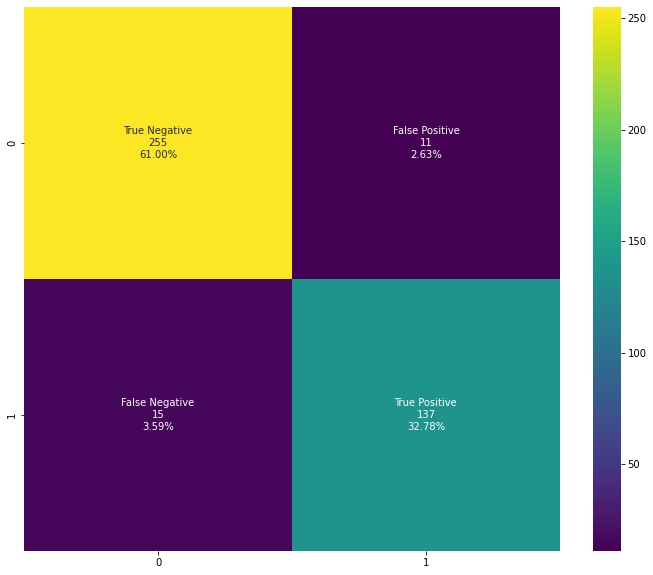

In [70]:
confusion_matrix_view(y_test, y_pred, cm)

In [71]:
score(y_test, y_pred)

The Accuracy score is : 0.94
The Precision score is : 0.93


## Logistic Regression :

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [73]:
def logistic_regression_pred(X, y, z):

    model = LogisticRegression(random_state=0)
    model.fit(X, y)
    y_pred = model.predict(z)
    data = pd.DataFrame(
        {'PassengerId': df_test['PassengerId'], 'Survived': y_pred})
    return(y_pred, data)

In [74]:
y_pred, data_frame_reg_log = logistic_regression_pred(X, y, X_test)

In [75]:
data_frame_reg_log

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<AxesSubplot:>

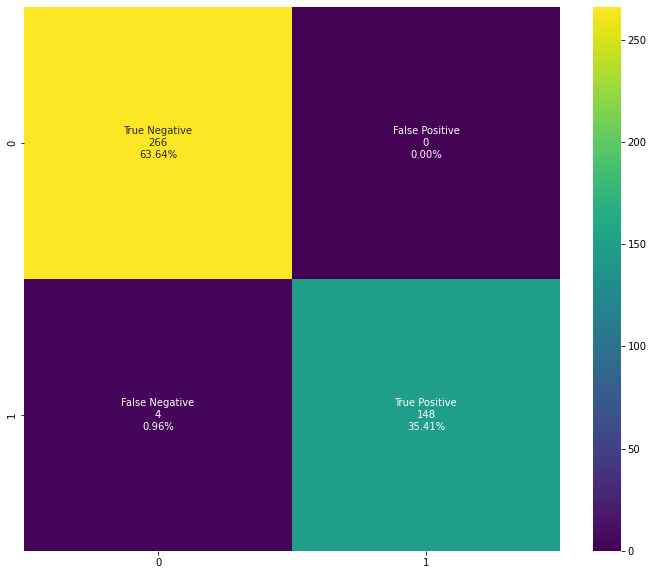

In [76]:
confusion_matrix_view(y_test, y_pred, cm)

In [77]:
score(y_test, y_pred)

The Accuracy score is : 0.99
The Precision score is : 1.0


## Optimization of Logistic Regression :

In [81]:
from sklearn.model_selection import GridSearchCV

In [117]:
%%time
# Define Search Param
params = {'max_iter': [1, 2, 3, 4, 5],
          'solver': ['newton-cg', 'lbfgs', 'liblinear'], }

# Init the Model
model = LogisticRegression(random_state=0)

# Init Grid Search Class
model_log = GridSearchCV(model,
                         param_grid=params,
                         cv=5,
                         verbose=2,
                         n_jobs=-1,
                         )

# Do the Grid Search
model_log.fit(X, y)
y_pred_log = model_log.predict(X_test)

data_log = pd.DataFrame(
    {'PassengerId': df_test['PassengerId'], 'Survived': y_pred_log})

# Model to choose :
best_lda_model_log = model_log.best_estimator_

# Best parameters :
print("Best parameters : ", model_log.best_params_)

# Best score :
print("Best Score : ", round((model_log.best_score_), 2))

# view of data :
display(data_log)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters :  {'max_iter': 4, 'solver': 'newton-cg'}
Best Score :  0.8


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


CPU times: user 114 ms, sys: 11.2 ms, total: 125 ms
Wall time: 136 ms


In [118]:
score(y_test, y_pred_log)

The Accuracy score is : 0.99
The Precision score is : 1.0


<AxesSubplot:>

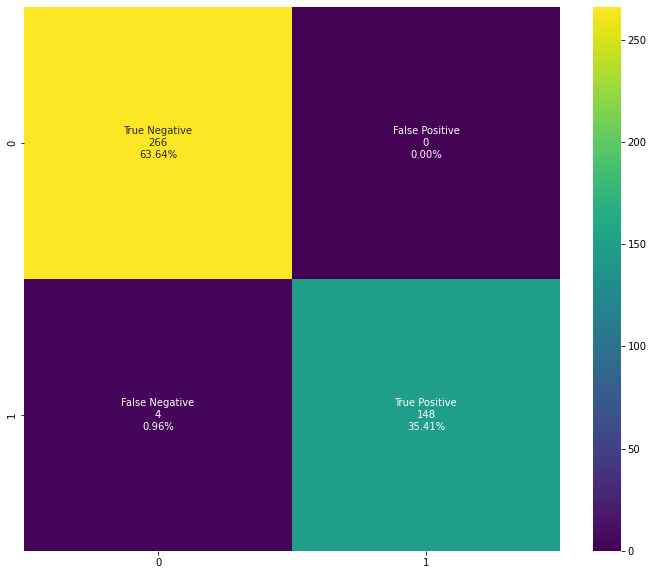

In [119]:
confusion_matrix_view(y_test, y_pred_log, cm)

No changement between optimization or not.

In [79]:
data_frame_reg_log.to_csv('kaggle.csv', index=False)

# Conclusion : 

As we can see, some fact can help people to survive during the crash :

- The fact to be a woman help u to survive.

- the fact to be rich or with a rank will help u to survive.

- The fact to have an expensive ticket will help u to survive.

About the algorithm, the best choice here is to use regression logistic higher score.

In [80]:
# PEP 8 à utiliser